# 1. Problem Definition

We aim to minimize two objective functions:

- $ f_1(x,y) = x^2 + y^2 $ (minimize the distance to the origin (0,0))
- $ f_2(x,y) = (x-1)^2 + y^2 $ (minimize the distance to the point (1,0))

Additionally, there is one constraint:

- $ x+y \geq 1 $

---

# 2. Visual Interpretation

- $ f_1 $ seeks to bring $ (x, y) $ as close as possible to the origin (0,0).
- $ f_2 $ seeks to bring $ (x, y) $ as close as possible to the point (1,0).
- Setting $ x = y = 0 $ is not allowed due to the constraint.

We must find points that **satisfy the constraint** and **balance both objectives**.

---

# 3. Formulation as an Optimization Problem

A simple strategy is to apply the **weighted sum method**:  
We combine the two objectives into a single scalar function using a linear combination.

The resulting function to minimize is:

$
\text{minimize} \quad w_1 \times f_1(x, y) + w_2 \times f_2(x, y)
$

where:
- $ w_1 $ and $ w_2 $ are non-negative weights (\( w_1, w_2 \geq 0 \)) that represent the importance of each objective.
- $ w_1 + w_2 = 1 $ (often normalized, but not strictly necessary unless specified).


We use `scipy.optimize.minimize` to solve this problem.

---

# 4. Conclusion

In this exercise, we demonstrated how a multi-objective optimization problem can be transformed into a single-objective problem by using the **weighted sum method**.  
This approach allows us to explore different solutions based on the priorities assigned to each objective.

---


In [18]:
import numpy as np
from scipy.optimize import minimize

# Define the objective functions
def f1(x):
    return x[0]**2 + x[1]**2

def f2(x):
    return (x[0] - 1)**2 + x[1]**2

# Define a combined (weighted) function
def weighted_sum(x, w1=0.5, w2=0.5):
    return w1 * f1(x) + w2 * f2(x)

# Define the constraint: x + y >= 1 --> -(x+y) + 1 <= 0
def constraint(x):
    return x[0] + x[1] - 1

# constraints
def satisfies_constraints(x, y):
    return x + y >= 1
###########################################################
############### Funciones para PSO ###############
###########################################################
def f1_p(x, y):
    return x**2 + y**2

def f2_p(x, y):
    return (x-1)**2 + y**2

# Función combinada
def weighted_sum_p(x, y, w1=0.5, w2=0.5):
    return w1 * f1_p(x, y) + w2 * f2_p(x, y)

# constraints
def satisfies_constraints_p(x, y):
    return x + y >= 1




In [6]:
# Set the constraints in scipy format
cons = ({
'type': 'ineq', # 'ineq' means >= 0
'fun': constraint
})

# Period initial
x0 = [0.5, 0.5]

# Perform the optimization
res = minimize(weighted_sum, x0, constraints=cons)

# Print the results
print("Optimization successful?", res. success)
print("Solution found (x, y):", res. x)
print("Value of f1:", f1(res. x))
print("Value of f2:", f2(res. x))
print("Combined values:", weighted_sum(res. x))

Optimization successful? True
Solution found (x, y): [0.75 0.25]
Value of f1: 0.625
Value of f2: 0.125
Combined values: 0.375


In [12]:
weights = [(0.1, 0.9),(0.2, 0.8),(0.3, 0.7),(0.4,0.6), (0.5, 0.5),(0.6, 0.4),(0.7, 0.3), (0.8, 0.2),(0.9, 0.1)]

for w1, w2 in weights:
    res = minimize(weighted_sum, x0, args=(w1, w2), constraints=cons)
    print(f"Weights: w1={w1}, w2={w2}")
    print("  Solution (x, y):", res.x)
    print("  f1:", f1(res.x), " f2:", f2(res.x))
    print("  Weighted sum value:", weighted_sum(res.x, w1, w2))
    print()

Weights: w1=0.1, w2=0.9
  Solution (x, y): [0.95 0.05]
  f1: 0.9049999999999999  f2: 0.005000000000000003
  Weighted sum value: 0.095

Weights: w1=0.2, w2=0.8
  Solution (x, y): [0.9 0.1]
  f1: 0.8200000000000001  f2: 0.01999999999999999
  Weighted sum value: 0.18000000000000002

Weights: w1=0.3, w2=0.7
  Solution (x, y): [0.85 0.15]
  f1: 0.7449999999999999  f2: 0.04500000000000001
  Weighted sum value: 0.25499999999999995

Weights: w1=0.4, w2=0.6
  Solution (x, y): [0.8 0.2]
  f1: 0.6799999999999999  f2: 0.08000000000000006
  Weighted sum value: 0.32

Weights: w1=0.5, w2=0.5
  Solution (x, y): [0.75 0.25]
  f1: 0.625  f2: 0.125
  Weighted sum value: 0.375

Weights: w1=0.6, w2=0.4
  Solution (x, y): [0.7 0.3]
  f1: 0.58  f2: 0.1800000000000001
  Weighted sum value: 0.42000000000000004

Weights: w1=0.7, w2=0.3
  Solution (x, y): [0.65 0.35]
  f1: 0.5450000000000002  f2: 0.2450000000000005
  Weighted sum value: 0.4550000000000002

Weights: w1=0.8, w2=0.2
  Solution (x, y): [0.6 0.4]
  f

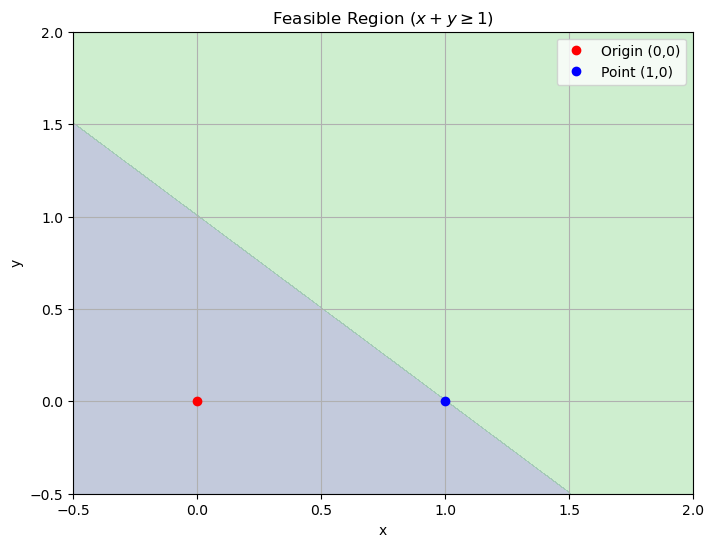

In [13]:
import matplotlib.pyplot as plt

# Create a grid
x = np.linspace(-0.5, 2, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)

# Define constraint
constraint_region = (X + Y >= 1)

# Plot feasible region
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, constraint_region, levels=[0, 0.5, 1], alpha=0.3)

# Plot important points
plt.plot(0, 0, 'ro', label='Origin (0,0)')
plt.plot(1, 0, 'bo', label='Point (1,0)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region ($x+y \\geq 1$)')
plt.legend()
plt.grid()
plt.show()


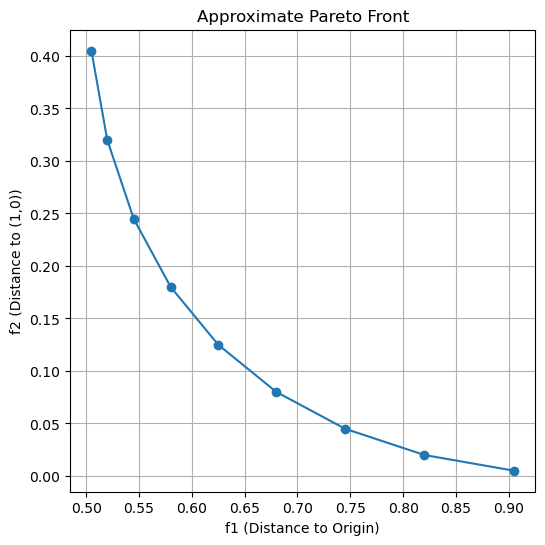

In [14]:
f1_values = []
f2_values = []

for w1, w2 in weights:
    res = minimize(weighted_sum, x0, args=(w1, w2), constraints=cons)
    f1_values.append(f1(res.x))
    f2_values.append(f2(res.x))

plt.figure(figsize=(6, 6))
plt.plot(f1_values, f2_values, 'o-')
plt.xlabel('f1 (Distance to Origin)')
plt.ylabel('f2 (Distance to (1,0))')
plt.title('Approximate Pareto Front')
plt.grid()
plt.show()


In [15]:
import pandas as pd

results = []

for w1, w2 in weights:
    res = minimize(weighted_sum, x0, args=(w1, w2), constraints=cons)
    results.append({
        'w1': w1,
        'w2': w2,
        'x': res.x[0],
        'y': res.x[1],
        'f1(x,y)': f1(res.x),
        'f2(x,y)': f2(res.x),
        'Weighted sum': weighted_sum(res.x, w1, w2)
    })

results_df = pd.DataFrame(results)
display(results_df)


,w1,w2,x,y,"f1(x,y)","f2(x,y)",Weighted sum
0,0.1,0.9,0.95,0.05,0.905,0.005,0.095
1,0.2,0.8,0.90,0.10,0.820,0.020,0.180
2,0.3,0.7,0.85,0.15,0.745,0.045,0.255
3,0.4,0.6,0.80,0.20,0.680,0.080,0.320
4,0.5,0.5,0.75,0.25,0.625,0.125,0.375
5,0.6,0.4,0.70,0.30,0.580,0.180,0.420
6,0.7,0.3,0.65,0.35,0.545,0.245,0.455
7,0.8,0.2,0.60,0.40,0.520,0.320,0.480
8,0.9,0.1,0.55,0.45,0.505,0.405,0.495


# Particle Swarm Optimization (PSO)

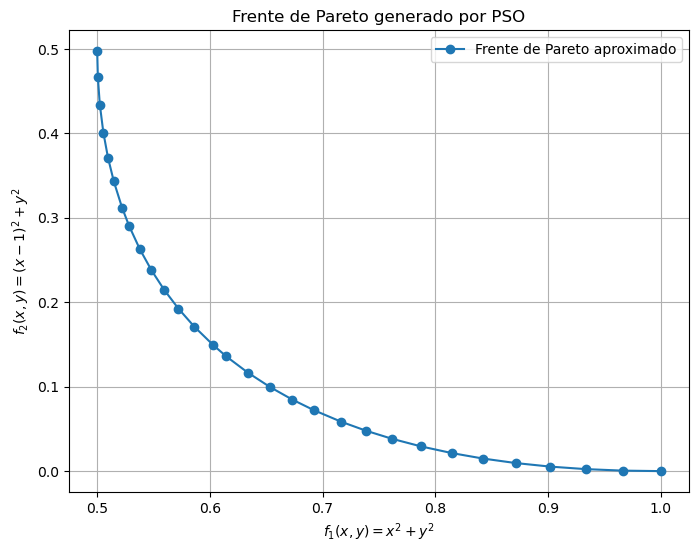

In [19]:


# PSO Function (básico)
def pso(w1, w2, num_particles=30, num_iterations=50):
    positions = np.random.uniform(0, 2, (num_particles, 2))
    velocities = np.random.uniform(-0.1, 0.1, (num_particles, 2))

    pbest_positions = np.copy(positions)
    pbest_values = np.array([
        weighted_sum_p(x, y, w1, w2) if satisfies_constraints_p(x, y) else np.inf
        for x, y in positions
    ])

    best_particle_idx = np.argmin(pbest_values)
    gbest_position = pbest_positions[best_particle_idx]
    gbest_value = pbest_values[best_particle_idx]

    for _ in range(num_iterations):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (0.5 * velocities[i]
                             + 1.5 * r1 * (pbest_positions[i] - positions[i])
                             + 1.5 * r2 * (gbest_position - positions[i]))
            positions[i] += velocities[i]
            
            if satisfies_constraints(positions[i][0], positions[i][1]):
                value = weighted_sum_p(positions[i][0], positions[i][1], w1, w2)
                if value < pbest_values[i]:
                    pbest_positions[i] = positions[i]
                    pbest_values[i] = value
                    if value < gbest_value:
                        gbest_position = positions[i]
                        gbest_value = value

    return gbest_position

# Ahora generamos varias soluciones variando los pesos
num_points = 30
weights = np.linspace(0, 1, num_points)
solutions = []

for w1 in weights:
    w2 = 1 - w1
    best_position = pso(w1, w2)
    solutions.append(best_position)

# Calculamos f1 y f2 para cada solución
f1_values = [f1_p(x, y) for x, y in solutions]
f2_values = [f2_p(x, y) for x, y in solutions]

# Dibujamos el frente de Pareto
plt.figure(figsize=(8,6))
plt.plot(f1_values, f2_values, 'o-', label="Frente de Pareto aproximado")
plt.xlabel('$f_1(x,y) = x^2 + y^2$')
plt.ylabel('$f_2(x,y) = (x-1)^2 + y^2$')
plt.title('Frente de Pareto generado por PSO')
plt.grid(True)
plt.legend()
plt.show()


In [21]:
import pandas as pd

# Suponemos que ya existe `solutions` y `weights`
results_pso = []

for (best_position, w1) in zip(solutions, weights):
    w2 = 1 - w1
    results_pso.append({
        'w1': round(w1, 2),
        'w2': round(w2, 2),
        'x': best_position[0],
        'y': best_position[1],
        'f1(x,y)': f1_p(best_position[0], best_position[1]),
        'f2(x,y)': f2_p(best_position[0], best_position[1]),
        'Weighted sum': weighted_sum_p(best_position[0], best_position[1], w1, w2)
    })

# Convertir a DataFrame
results_pso_df = pd.DataFrame(results_pso)

# Mostrar
display(results_pso_df)


,w1,w2,x,y,"f1(x,y)","f2(x,y)",Weighted sum
0,0.00,1.00,1.000052,0.000016,1.000105,3.014568e-09,3.014568e-09
1,0.03,0.97,0.982897,0.017105,0.966378,5.850989e-04,3.388832e-02
2,0.07,0.93,0.965490,0.034510,0.933362,2.381911e-03,6.658743e-02
3,0.10,0.90,0.948393,0.051604,0.902113,5.326235e-03,9.809723e-02
4,0.14,0.86,0.930842,0.069156,0.871249,9.565401e-03,1.284183e-01
5,0.17,0.83,0.913639,0.086362,0.842194,1.491664e-02,1.575507e-01
6,0.21,0.79,0.896821,0.103179,0.814933,2.129180e-02,1.854935e-01
7,0.24,0.76,0.879249,0.120751,0.787660,2.916157e-02,2.122474e-01
8,0.28,0.72,0.861674,0.138328,0.761617,3.826880e-02,2.378130e-01
9,0.31,0.69,0.845390,0.154610,0.738588,4.780863e-02,2.621885e-01
